<a href="https://colab.research.google.com/github/Yoon0527/AI_study/blob/main/Hands_on_ML(1~4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1장. 한눈에 보는 머신러닝

In [ ]:
# 삶의 만족도 데이터, 1인당 GDP 데이터를 합치는 함수
# csv 파일 두 개(oecd_bli, gdp_per_capita)를 인자로 받음
def prepare_country_stats(oecd_bli, gdp_per_capita):

    # 
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

    # pivot: 데이터의 열을 기준으로 pivot table로 변환시키는 메서드
    # pivot table: 데이터의 다양한 연산을 가능하게 하는 것
    # index: 그룹핑하고 싶은 column명을 넣는다. 이 경우 Country, 여러 column을 넣을 수 있음, 그냥 열 위치에 들어갈 열이다.
    # columns: 선택적으로 적용하는 설정으로, values를 추가로 구분하기 위해서 선택하는 옵션
    # values: 데이터로 사용할 열
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    # rename: 2015열의 이름을 GDP per capita로 바꾼다. 만약 inplace가 True가 없으면 바뀐 열 이름이 적용되지 않음
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

    # set_index: 인덱스를 테이블에 추가..?
    gdp_per_capita.set_index("Country", inplace=True)

    # merge: 두 df를 합친다.
    # 
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    # GDP per capita 값을 오름차순으로 정렬. inplace가 True면 df에 적용함
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [ ]:
# 필요한 라이브러리 import
# matplotlib.pyplot: 데이터 시각화 라이브러리
# numpy: 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리
# pandas: 데이터 조작 및 분석을 위한 라이브러리
# sklearn: 머신러닝 라이브러리. 여기서는 linear_model. 즉 선형 모델을 불러옴
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv('/content/drive/MyDrive/aiffel/hands_on_ml/datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('/content/drive/MyDrive/aiffel/hands_on_ml/datasets/lifesat/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

# 데이터 준비
# np.c_: 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열로 만든다. 1개여도 2차원 배열로 만듦
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [ ]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [ ]:
print(X)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


In [ ]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

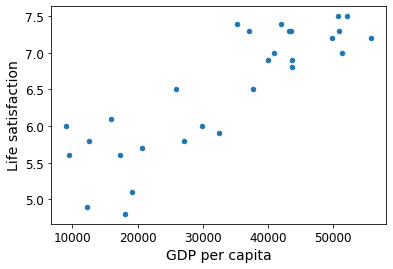

[[5.96242338]]


In [ ]:
# 데이터 시각화
# kind: 그래프의 종류. 여기서는 scatter(산점도), x: x축, y: y축
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# 그래프 출력
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

In [ ]:
# 3-최근접 이웃 회귀 모델로 바꿉니다.
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델을 훈련합니다.
model1.fit(X,y)

# 키프로스에 대한 예측을 만듭니다.
print(model1.predict(X_new)) # 출력 [[5.76666667]]

[[5.76666667]]


# 2장. 머신러닝 프로젝트 처음부터 끝까지

In [5]:
# 필요한 라이브러리 import
# os: 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해준다. 파일을 복사하거나 디렉터리를 생성하고, 특정 디렉터리 내의 파일 목록을 구하고자 할 때 등.
# tarfile: tar형식의 파일을 압축 해제
# urllib.request: url을 여는 데 도움이 되는 함수와 클래스를 정의한다.
import os
import tarfile
import urllib.request


# url을 변수에 저장
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"

# os.path.join: 인수에 전달된 두 개의 문자열을 결합해 1개의 경로로 만듦. 'datasets' + 'housing'
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"



def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # housing_path 디렉터리가 존재하지 않으면,
    if not os.path.isdir(housing_path):
        # housing_path에 디렉터리를 만들어라.
        os.makedirs(housing_path)

    # housing_path 경로와 'housing.tgz'를 합쳐서 tgz_path 변수에 저장
    tgz_path = os.path.join(housing_path, "housing.tgz")

    # urllib.request.urlretrieve: url이 가리키는 주소에 접근해서 해당 자원을 저장할 수 있음.
    urllib.request.urlretrieve(housing_url, tgz_path)

    # tgz_path에 저장된 경로가 가리키는 tgz파일을 open
    housing_tgz = tarfile.open(tgz_path)

    # extractall: 모든 파일 압축 해제
    housing_tgz.extractall(path=housing_path)

    # open 함수로 열었던 걸 닫는 함수
    # close 해주지 않고 이후에 다시 사용하면 오류가 발생할 수 있다.
    housing_tgz.close()

In [6]:
# 현재 작업 공간에 datasets/housing 디렉터리를 만들고
# housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만든다.
fetch_housing_data()

In [7]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):

    # 인자로 받은 housing_path와 'housing.csv'를 join
    # 즉, csv_path 변수에는 housing_path 경로에 있는 housing.csv 파일을 가리키는 정보가 있음
    csv_path = os.path.join(housing_path, "housing.csv")

    # csv_path에 있는 housing.csv를 pandas dataframe으로 읽어 반환
    return pd.read_csv(csv_path)

In [4]:
# load_housing_data 함수에서 반환된 pd.read_csv(csv_path)가 저장된다.
housing = load_housing_data()

# housing 변수에 저장된 dataframe을 위에서 5개만 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# 형태 확인
# 20640개의 데이터가 있고 10개의 feature가 있다.
housing.shape

(20640, 10)

In [8]:
# 데이테에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


위 info()의 결과에서 ocean_proximity만 type이 object인데, 데이터를 csv에서 읽어 들였기 때문에 텍스트 특성일 것이라는 걸 알 수 있음. 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구영이 있는지 알아보자.

In [9]:
# ocean_proximity 열의 값에 대해 알아보기
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# describe 메서드는 숫자형 특성의 요약 정보를 보여준다.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* count: 총 데이터의 개수
* mean: 데이터들의 평균값
* std: 값이 퍼져있는 정도를 측정하는 표준편차
* min: 최소값
* 25%, 50%, 75%: 백분위수. 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타낸다.
  * 25%의 구역은 housing_median_age가 18보다 작고, 50%는 29보다 작고 75%는 37보다 작다. 
* max: 최대값

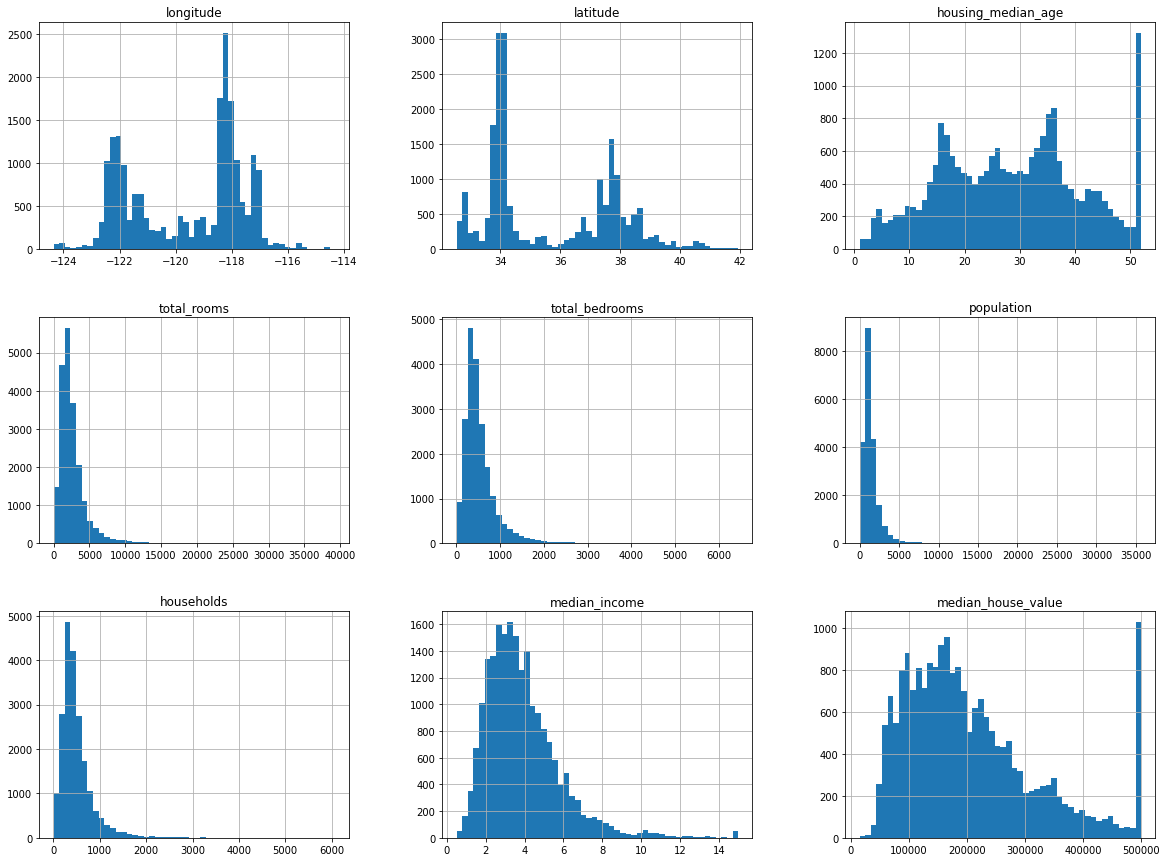

In [13]:
# 각 숫자형 특성을 히스토그램으로 그려 데이터의 형태를 빠르게 검토한다.
# matplotlib inline 메서드로 그래프를 그리기 전에 matplotlib이 사용할 백엔드를 지정해준다.
# 그 이유는 화면에 그래프를 그리기 위해 사용자 컴퓨터의 그래픽 백엔드를 필요로 하기 때문이다.
# 이 메서드를 사용해서 자체 백엔드를 사용하게끔 설정한다.
%matplotlib inline
import matplotlib.pyplot as plt

# 히스토그램 그리기
# hist: 히스토그램 메서드, bins: 가로축 구간의 개수, figsize: 그래프의 사이즈
# 그 외에 histtype 인자로 히스토그램의 종류를 지정할 수도 있다. (histtype='bar', 'barstacked', 'step', 'stepfilled' 등.)
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 테스트 셋 만들기

In [15]:
import numpy as np
# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

In [17]:
# 데이터와 test_ratio(test셋의 비율)을 인자로 받는다
def split_train_test(data, test_ratio):
    # len(data)만큼의 무작위로 섞인 배열을 만들어 shuffled_indices 변수에 저장한다.
    # 섞어주지 않으면 과적합의 위험이 있나?? 또는 학습과 검증의 성능을 올리기 위해서?
    shuffled_indices = np.random.permutation(len(data))

    # test_set의 사이즈를 len(data)와 test_ratio의 곱으로 정한다.
    # 예를 들어 데이터는 20640개, 비율을 test_ratio를 0.2로 하면 전체 데이터셋에 20%가 test set이 된다. 
    test_set_size = int(len(data) * test_ratio)

    # test_indices에 데이터의 수만큼의 범위의 수를 무작위로 섞은 numpy 배열 중 0번째부터 test_set_size까지의 배열을 저장
    test_indices = shuffled_indices[:test_set_size]

    # train_indices에 test_set_size부터 끝까지의 배열을 저장
    train_indices = shuffled_indices[test_set_size:]

    # iloc: integer location의 약어로, 데이터프레임의 행이나 컬럼에 인덱스 값으로 접근한다. <-> loc: df의 행이나 컬럼에 label이나 boolean array로 접근
    # data에 train_indices에 저장된 인덱스값을 이용해 접근하고 반환, 마찬가지로 test_indices도 반환한다.
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
# housing 데이터와 test_ratio로 0.2를 넘겨준다
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [19]:
len(test_set)

4128

In [20]:
# zlib: 압축과 압축 해제를 위한 라이브러리
# crc32: CRC(Cyclic Redundancy Check, 순환 중복 검사)는 네트워크 등을 통하여 데이터를 전송할 때 전송된 데이터에 오류가 있는지 확인하기 위한 체크값을 결정하는 방식
  # crc8, 10, 16, 32 유형이 있다.
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [21]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [22]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [23]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [24]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [25]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [26]:
# sklearn_model_selection 모듈에 train_test_split을 import
from sklearn.model_selection import train_test_split

# train_test_split: 데이터를 train과 test set으로 나눠준다.
# (나누고자 하는 데이터, test_size= 비율, random_state=난수 초깃값 설정)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [27]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [29]:
# pd.cut: 수치형 변수를 특정 구간으로 나눈 범주형 레이블을 생성할 수 있다. 특정 구간에 대한 그룹별 통계량을 구하는 것을 가능하게 한다.
# pd.cut(데이터[열], bins=나누고자 하는 구간, labels=라벨명)
# np.inf: 무한대 범위를 지정(bin을 정의하기 위함이라는데 잘 모르겠다. 참고: https://kongdols-room.tistory.com/175) 
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [30]:
# housing 데이터에서 income_cat 열의 수치형 값들을 확인
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

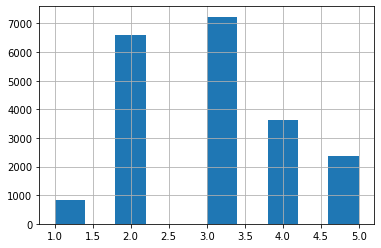

In [31]:
# housing 데이터 중 income_cat 열의 히스토그램을 그린다.
housing["income_cat"].hist()

In [32]:
# StratifiedShuffleSplit: 계층적 샘플링을 위해 사용한다. StratifiedKFold의 계층 샘플링과 ShuffleSplit의 랜덤 샘플링을 합친것으로, 
# test_size와 train_size 매개변수의 합을 1 이하로 지정할 수도 있다.
from sklearn.model_selection import StratifiedShuffleSplit

# n_split: 나누고자 하는 train/test set의 개수. 1개의 train/test set만 분할하니까 1로 지정
# test_size: test set의 비율
# random_state: 난수 초기값
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# housing 데이터를 train_index, housing 데이터에서 income_cat 열의 데이터를 test_index에 할당?
for train_index, test_index in split.split(housing, housing["income_cat"]):

    # strat_train_set에 housing 데이터의 train_index에 해당하는 label값을 할당
    strat_train_set = housing.loc[train_index]

    # strat_test_set에 test_index에 해당하는 label 할당?
    strat_test_set = housing.loc[test_index]

In [34]:
# 테스트 셋에서 소득 카테고리의 비율
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [36]:
# housing 소득 카테고리의 비율
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [37]:
# income_cat feature 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 이해를 위한 탐색과 시각화

In [39]:
# 원본을 손상시키지 않기 위해 복사
housing = strat_train_set.copy()

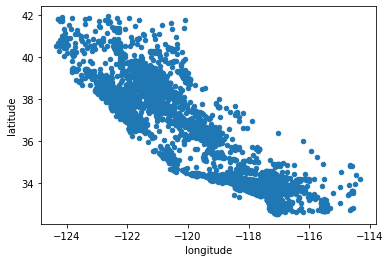

In [42]:
# x축에 longitude, y축에 latitude로 두고 산점도 그래프 출력
housing.plot(kind="scatter", x="longitude", y="latitude")

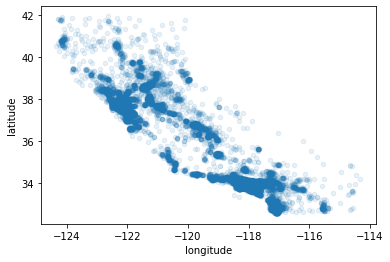

In [43]:
# 밀집 영역을 보기 위해 parameter로 alpha=0.1을 준다.
# alpha: 0에서 1 사이의 값을 입력 받아 투명도를 조절.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

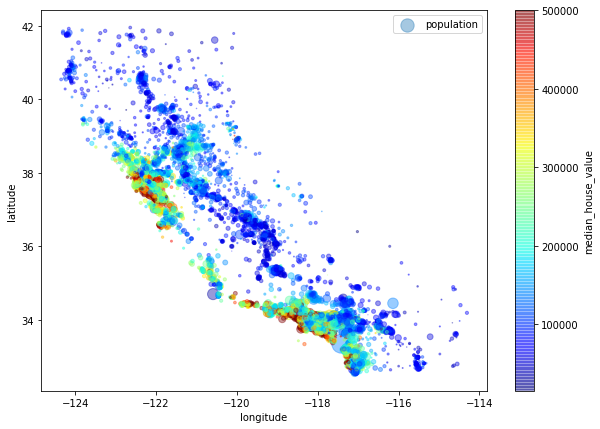

In [50]:
# plot의 매개 변수 (https://kongdols-room.tistory.com/92)
# s: 원의 반지름, 여기서는 구역의 인구를 나타낸다.
# label은 인구로 설정
# c: 마커의 색을 설정. 가격을 나타낸다.
# cmap: 낮은 가격(파란색)에서 높은 가격(빨간색)까지 범위를 나타낸다. 
# colorbar: 그래프 오른쪽에 colorbar 출력
# sharex: 모든 서브plot이 같은 x축 눈금을 사용하도록 xlim을 조정하면 모든 서브 plot에 조정
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

# legend(범례)는 그래프에 데이터의 종류를 표시하기 위한 텍스트이다
# 여기서는 population
plt.legend()

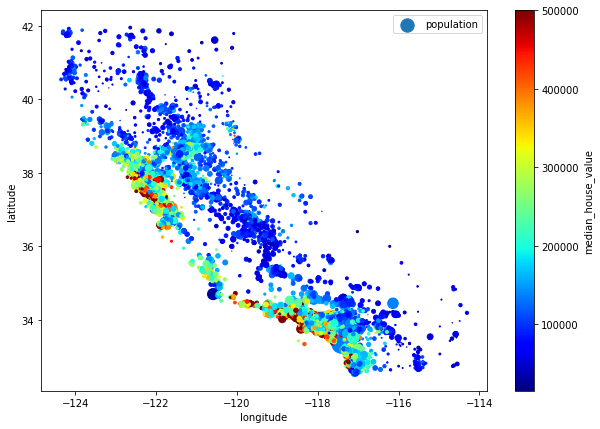

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1.0,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [52]:
# Download the California 
# 경로를 '.'로 지정하는 건 현재 위치를 뜻한다.
PROJECT_ROOT_DIR = "."

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f09caf75410>)

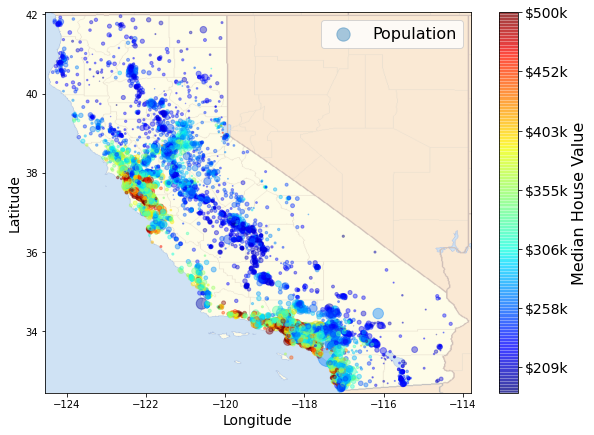

In [54]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()